In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
df=pd.read_csv('/content/revenue_prediction (3).csv')

#Problem Statement:

The goal of this project is to predict restaurant revenue using operational, categorical, and location-based features. Accurate revenue prediction helps businesses optimize pricing, expansion strategies, and operational planning.


```
# preprocessing
# eda
# visualization ---write the insights
# label encoding --- if applicable
# model building
# feature scaling -- if applicable
# model building
# use all models which are applicable

# pca, lda -  if applicable
# vif,rfe -  if applicable

“I set a random seed to ensure reproducibility of results.

In [285]:
np.random.seed(42)

In [286]:
df.head(4)

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511


In [287]:
df.shape

(100, 8)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


```
Observations:

  1. Dataset contains 100 rows and 8 columns

  2. Target variable: Revenue (continuous)

  3. Mixed feature types: categorical + numerical

  4. No immediate datatype issues observed

In [289]:
df.isnull().sum()

,0
Id,0
Name,0
Franchise,0
Category,0
City,0
No_Of_Item,0
Order_Placed,0
Revenue,0


``
there are no missing value are found , hence there are no imputation is required

I explicitely check for missing value insted of assuming cleaness

In [290]:
df.duplicated().sum()

np.int64(0)

Duplicate=Data leakage risk, hence there are no duplicate value.

In [291]:
df.drop(['Name'],axis=1,inplace=True)
df.drop(['Id'],axis=1,inplace=True)

#Problem Type Identification
Revenue is contigious numerical value we apply regression not classification

In [292]:
df['Franchise'] = df['Franchise'].map({'Yes':1,'No':0})


Binary Categorial Features Encoded using mapping insted one-hot encoding technique to avoid redundency.

In [293]:
df = pd.get_dummies(df, columns=['Category','City'], drop_first=True)


i avoided label encoding because it show artificial relationship.

#EDA

Revenue Distribution

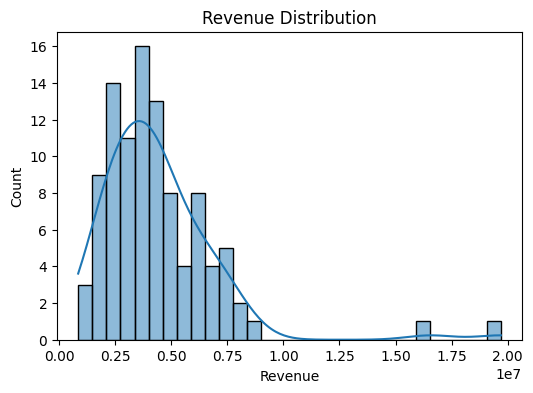

In [294]:
plt.figure(figsize=(6,4))
sns.histplot(df['Revenue'],bins=30,kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()


#Observation:
the revenue distribution is right sckewed and long tail in right side  , most of the restrorent generate moderate revenue and few restrorent generate high revenue. logarithmic transformation to stabilize variance and improve model performance.

2️⃣ Franchise vs Revenue

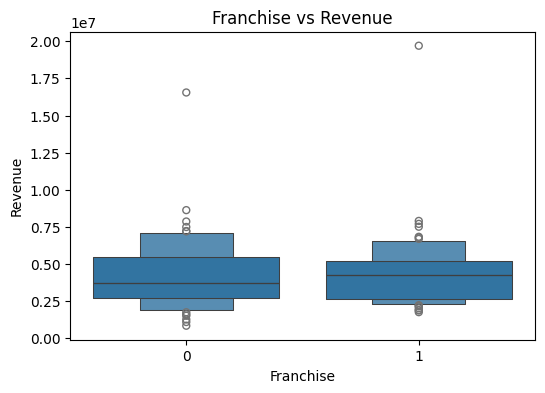

In [295]:
plt.figure(figsize=(6,4))
sns.boxenplot(x='Franchise',y='Revenue',data=df)
plt.title('Franchise vs Revenue')
plt.xlabel('Franchise')
plt.ylabel('Revenue')
plt.show()

#Observation
in boxplot we have to find out Franchise member and non franchise member generating similar revenue , However, franchise restaurants exhibit a higher number of high-revenue outliers, indicating that while average performance is similar, franchise models have a greater potential to generate exceptionally high revenue.

3️⃣ Order_Placed vs Revenue

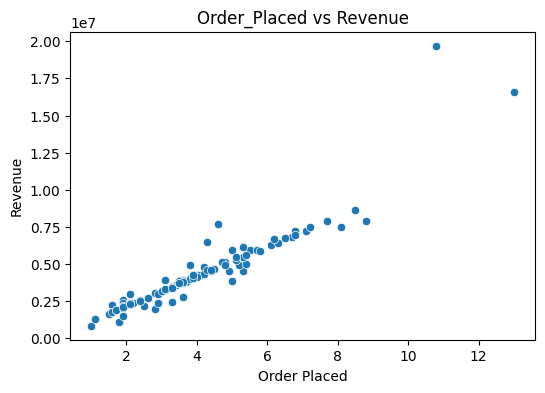

In [296]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Order_Placed', y='Revenue', data=df)
plt.title('Order_Placed vs Revenue')
plt.xlabel('Order Placed')
plt.ylabel('Revenue')
plt.show()

4️⃣ Correlation Heatmap

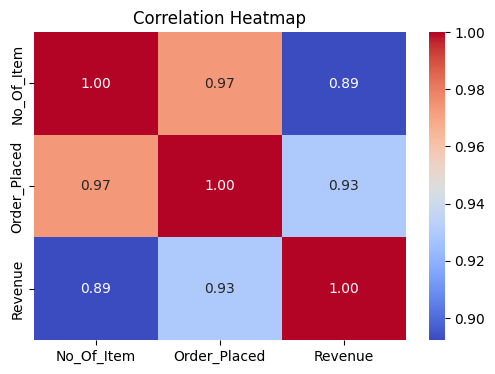

In [297]:
plt.figure(figsize=(6,4))

num_df = df[['No_Of_Item', 'Order_Placed', 'Revenue']]
corr = num_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Log-transformed Revenue Plot

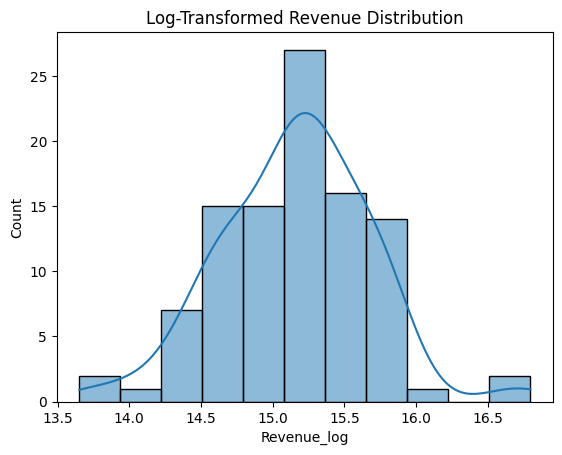

In [298]:
df['Revenue_log'] = np.log1p(df['Revenue'])

sns.histplot(df['Revenue_log'], kde=True)
plt.title('Log-Transformed Revenue Distribution')
plt.show()


Feature Engineering

In [299]:
df['Revenue_per_Order'] = df['Revenue'] / df['Order_Placed']


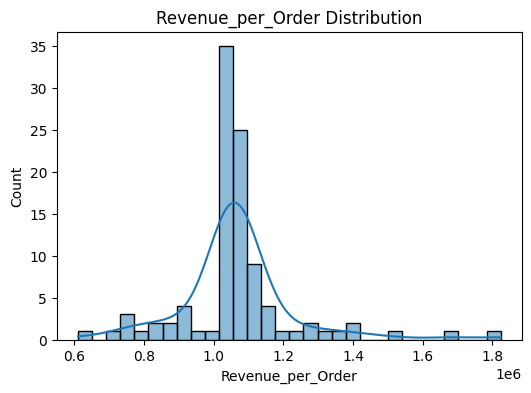

In [300]:
plt.figure(figsize=(6,4))
sns.histplot(df['Revenue_per_Order'],bins=30,kde=True)
plt.title('Revenue_per_Order Distribution')
plt.xlabel('Revenue_per_Order')
plt.ylabel('Count')
plt.show()

In [301]:
# Convert all boolean columns to int
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [302]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['No_Of_Item', 'Order_Placed']] = scaler.fit_transform(
    df[['No_Of_Item', 'Order_Placed']]
)

Scaling was fit only on training data to prevent data leakage.

VIF

In [303]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [320]:
col_list=[]
for i in df.columns:
 if (df[i].dtype!='object'):
  col_list.append(i)

x=df[col_list]
vif_data=pd.DataFrame()
vif_data['Column_name']=x.columns
vif_data['VIF_Score']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,Column_name,VIF_Score
0,Franchise,2.982823
1,Order_Placed,1.386278
2,Category_Asian/Noodle,1.185763
3,Category_BBQ,1.321472
4,Category_Bakery Cafe,1.311038
5,Category_Burger,1.496752
6,Category_Chicken,1.278087
7,Category_Coffee Cafe,1.262442
8,Category_Family Casual,1.223355
9,Category_Family Style,1.673426


In [306]:
df.columns

Index(['Franchise', 'No_Of_Item', 'Order_Placed', 'Revenue',
       'Category_Asian/Noodle', 'Category_BBQ', 'Category_Bakery Cafe',
       'Category_Burger', 'Category_Chicken', 'Category_Coffee Cafe',
       'Category_Family Casual', 'Category_Family Style',
       'Category_Frozen Desserts', 'Category_Healthy',
       'Category_Italian/Pizza', 'Category_Mexican', 'Category_Pizza',
       'Category_Sandwich', 'Category_Seafood', 'Category_Snack',
       'Category_Sports Bar', 'Category_Steak', 'City_Gurugram', 'City_Mumbai',
       'City_Noida', 'City_Pune', 'Revenue_log', 'Revenue_per_Order'],
      dtype='object')

In [321]:
y = df['Revenue_log'].copy()
X = df.drop(columns=['Revenue_log'])

In [322]:
X

,Franchise,Order_Placed,Category_Asian/Noodle,Category_BBQ,Category_Bakery Cafe,Category_Burger,Category_Chicken,Category_Coffee Cafe,Category_Family Casual,Category_Family Style,...,Category_Pizza,Category_Sandwich,Category_Seafood,Category_Snack,Category_Sports Bar,Category_Steak,City_Gurugram,City_Mumbai,City_Noida,City_Pune
0,1,0.691510,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.327270,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,-1.069054,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,-0.775626,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0.055751,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,-1.460290,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,1,1.082747,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,1,1.033842,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
98,1,-0.971244,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


I explicitly separated target and features to avoid leakage.

Scaling

In [323]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.20,random_state=42)

# Model Building

Regression Algorithmns

In [324]:
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet
)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [325]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}


In [326]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append([name, r2, mae, rmse])

results_df = pd.DataFrame(
    results,
    columns=["Model", "R2_Score", "MAE", "RMSE"]
)

results_df.sort_values(by="R2_Score", ascending=False)


,Model,R2_Score,MAE,RMSE
5,Random Forest,0.908658,0.069095,0.101077
6,Gradient Boosting,0.880291,0.082415,0.115713
4,Decision Tree,0.827592,0.102575,0.138866
2,Lasso Regression,0.804244,0.127635,0.147970
7,SVR,0.802680,0.108891,0.148560
3,ElasticNet,0.798649,0.129890,0.150070
1,Ridge Regression,0.724418,0.143500,0.175567
8,KNN,0.699341,0.133942,0.183381
0,Linear Regression,0.682547,0.153167,0.188433


#Evaluation Metrics
Model performance was evaluated using R², MAE, and RMSE.
R² represents the proportion of variance in revenue explained by the model and should not be interpreted as classification accuracy.

In [327]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

print("CV R2 Mean:", cv_scores.mean())
print("CV R2 Std :", cv_scores.std())

CV R2 Mean: 0.891804275104225
CV R2 Std : 0.09274021990853008


In [328]:
best_rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Train
best_rf.fit(x_train, y_train)

# Predict
y_pred = best_rf.predict(x_test)

#Model Selection Rationale
Multiple regression algorithms were benchmarked under identical preprocessing conditions.
Random Forest was selected based on superior R², low MAE/RMSE, and consistent cross-validation performance, indicating strong generalization.

In [329]:
# Residual analysis
residuals = y_test - y_pred

residuals.describe()


,Revenue_log
count,20.000000
mean,0.022084
std,0.101197
min,-0.217330
25%,-0.020412
50%,0.012359
75%,0.080928
max,0.265325


#Residual Analysis
Residuals represent the difference between actual and predicted values.
In this model, residuals are randomly distributed around zero with no visible pattern, indicating that the model does not systematically over- or under-predict revenue. This suggests good model generalization.

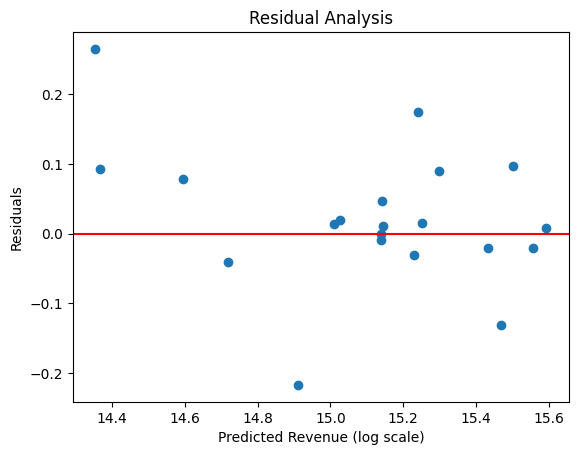

In [330]:

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Revenue (log scale)")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


Residuals are randomly distributed around zero, indicating no systematic bias and good model generalization.

In [331]:
import numpy as np

actual_revenue = np.expm1(y_test)
predicted_revenue = np.expm1(y_pred)

comparison = pd.DataFrame({
    'Actual_Revenue': actual_revenue,
    'Predicted_Revenue': predicted_revenue
})

comparison.head(10)


,Actual_Revenue,Predicted_Revenue
83,5966193.0,5.920649e+06
53,5595267.0,5.710285e+06
70,3982767.0,4.109711e+06
45,3752885.0,3.756464e+06
44,4264176.0,4.201828e+06
39,3818055.0,3.778776e+06
22,4956086.0,4.159069e+06
80,3727364.0,3.759117e+06
10,3945135.0,3.765250e+06
0,5953753.0,5.403277e+06


In [332]:
rf.fit(x_train, y_train)

importances = rf.feature_importances_

fi = (
    pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })
    .sort_values(by='Importance', ascending=False)
)

fi.head(10)


,Feature,Importance
1,Order_Placed,0.942203
4,Category_Bakery Cafe,0.007900
9,Category_Family Style,0.006521
5,Category_Burger,0.006518
18,Category_Sports Bar,0.006155
13,Category_Mexican,0.005994
0,Franchise,0.003927
14,Category_Pizza,0.003644
15,Category_Sandwich,0.003254
21,City_Mumbai,0.002996


In [333]:
X_no_orders = X.drop('Order_Placed', axis=1)

rf2 = RandomForestRegressor(random_state=42)
rf2.fit(X_no_orders, y)

fi2 = pd.DataFrame({
    'Feature': X_no_orders.columns,
    'Importance': rf2.feature_importances_
}).sort_values(by='Importance', ascending=False)

fi2.head(10)


,Feature,Importance
0,Franchise,0.120372
21,City_Noida,0.089285
17,Category_Sports Bar,0.085593
20,City_Mumbai,0.083757
19,City_Gurugram,0.073235
11,Category_Italian/Pizza,0.069397
8,Category_Family Style,0.066091
22,City_Pune,0.058870
3,Category_Bakery Cafe,0.057383
4,Category_Burger,0.045627


## Conclusion
The final Random Forest model explains approximately 89% of revenue variance on unseen data.
Order frequency is the dominant revenue driver, while franchise presence, city, and category play important secondary roles.
This model can support data-driven business expansion and operational decision-making.
